# Machine Learning Workflow on Diabetes Data

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Phase 0 -  Data Preparation

Datasets

URL : https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Phase 1 -  Data Exploration

In [0]:
diabetes = pd.read_csv('datasets/diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [0]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [0]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [0]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001C916D1160>,
      dtype=object)

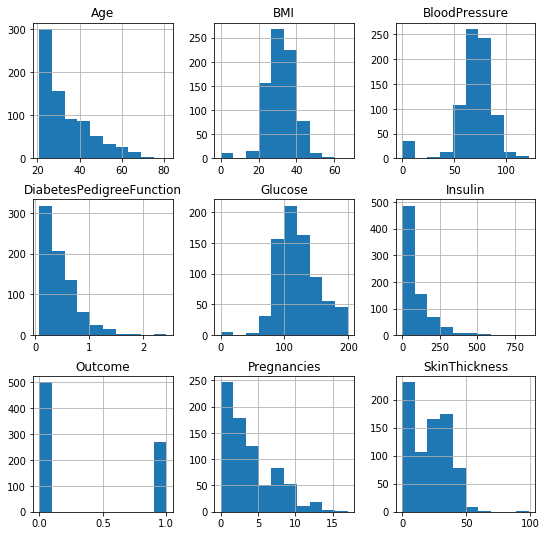

In [0]:
diabetes.hist(figsize=(9, 9))

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

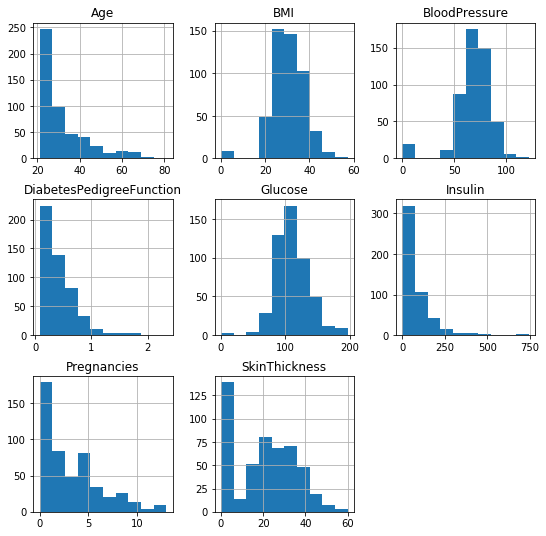

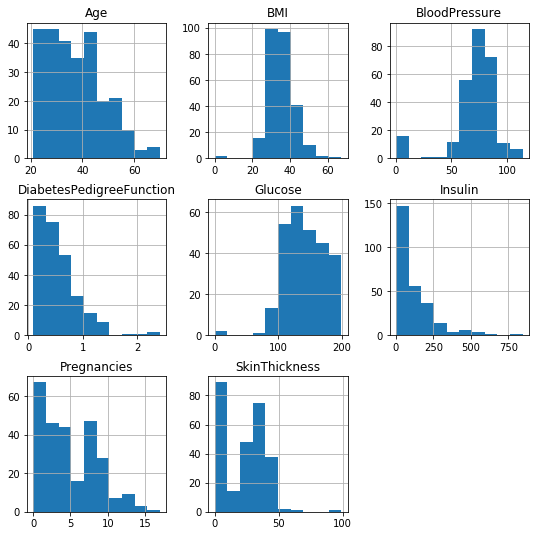

In [0]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

## Phase 2 - Data Cleaning

### Missing or Null Data points

In [0]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Unexpected Outliers

In [0]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [0]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [0]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [0]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [0]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [0]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


## Phase 3 - Model Selection

In [0]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

## Phase 4 - Model Selection

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [0]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

### Using Train/Test split

In [0]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [0]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.779006
3   DT  0.729282
4  GNB  0.734807
5   RF  0.751381
6   GB  0.773481
